# Car Price Prediction
This notebook details the development of a machine learning model to predict car prices for Chaky's company. 

### 1. Importing libraries

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('2.2.2', '2.2.3', '0.13.2', '3.10.0')

### 2. Load data

In [3]:
# loading the data
df = pd.read_csv("../data/Cars.csv")

In [4]:
# 
df.shape

(8128, 13)

In [5]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [6]:
# understanding the data types & non-null values of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [7]:
# understanding the min and max values of the columns
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [8]:
# getting all the unique values of  the owner column
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [9]:
# mapping the owner values to 1,2,3,4,5 since it's not possible with label encoding
df['owner'] = df['owner'].replace(['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car'], [1, 2, 3, 4, 5])


In [10]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [11]:
# understanding the unique values of fuel columm
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [12]:
# removing all rows with CNG and LPG because CNG and LPG use a different mileage sytem
df = df[~df['fuel'].isin(['CNG', 'LPG'])]

In [13]:
df.shape

(8033, 13)

In [14]:
# removing “kmpl” and converting column as float
df['mileage'] = df['mileage'].str.split(' ').str[0].astype(float)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [15]:
# removing "CC" and converting column as float
df['engine'] = df['engine'].str.split(' ').str[0].astype(float)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [16]:
# removing "bhp" and converting column as float
df['max_power'] = df['max_power'].str.split(' ').str[0].astype(float)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [17]:
# taking only the brand name and removing the rest
df['name'] = df['name'].str.split().str[0]
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [18]:
# not sure how torque works so doing as chaky says
df.drop(columns=['torque'], inplace=True)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [19]:
# checking selling price of Test Drive Cars to make sure 
df[df['owner'] == 5]


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
4383,Volkswagen,2019,1350000,5400,Diesel,Dealer,Manual,5,22.27,1498.0,108.60,5.0
4950,Audi,2019,6223000,7800,Petrol,Dealer,Automatic,5,15.26,1798.0,187.74,5.0
4951,Audi,2019,5923000,11500,Petrol,Dealer,Automatic,5,15.26,1798.0,187.74,5.0
4952,Audi,2019,6523000,23600,Petrol,Dealer,Automatic,5,15.26,1798.0,187.74,5.0
6220,Honda,2019,2000000,24857,Petrol,Dealer,Automatic,5,16.50,1799.0,139.46,5.0


In [20]:
# deleting samples for test drive cars
df = df[df['owner'] != 5]
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [21]:
df.fuel.unique(), df.seller_type.unique(), df.transmission.unique()

(array(['Diesel', 'Petrol'], dtype=object),
 array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object),
 array(['Manual', 'Automatic'], dtype=object))

In [22]:
# performing label encoding of the seller_type, fuel and transmission
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['fuel'] = le.fit_transform(df['fuel'])
df['seller_type'] = le.fit_transform(df['seller_type'])
df['transmission'] = le.fit_transform(df['transmission'])


In [23]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,0,1,1,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,1,1,1,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,0,1,1,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,1,1,1,1,16.10,1298.0,88.20,5.0


### 3. EDA (Exploratory Data Analysis)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   int64  
 5   seller_type    8028 non-null   int64  
 6   transmission   8028 non-null   int64  
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 815.3+ KB


In [25]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          214
engine           214
max_power        208
seats            214
dtype: int64

#### 3.1 Univariate Analysis

**Histogram**

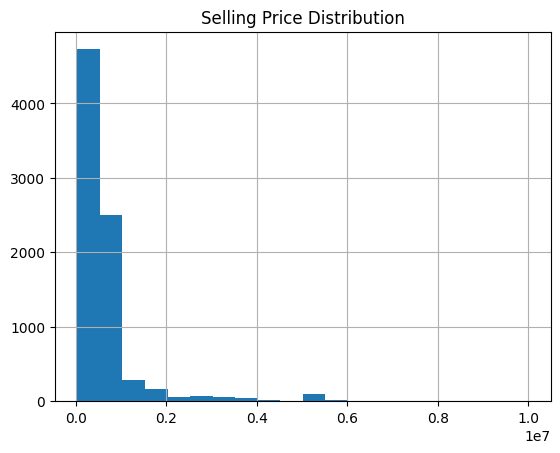

In [26]:
df['selling_price'].hist(bins=20)
plt.title('Selling Price Distribution')
plt.show()


**Boxplot**

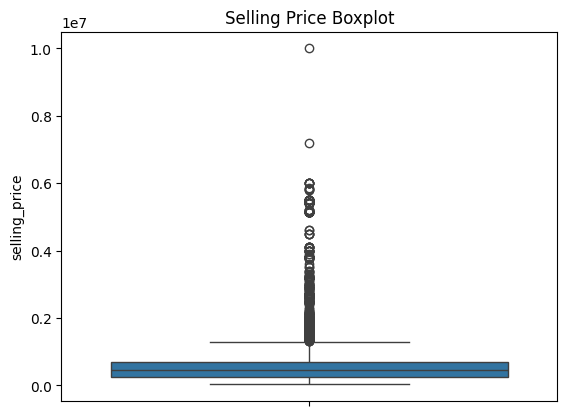

In [27]:
# to find out any outliers, using boxplot to identify them
sns.boxplot(df['selling_price'])
plt.title('Selling Price Boxplot')
plt.show()

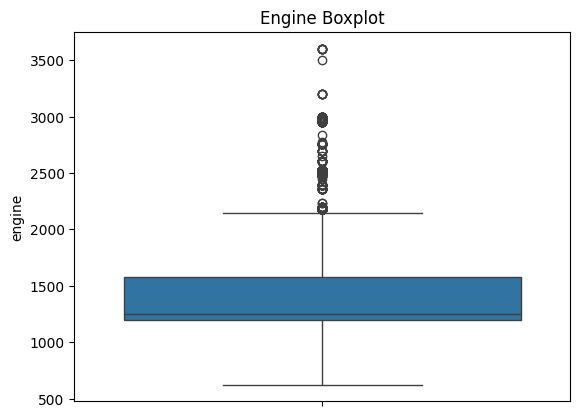

In [28]:
sns.boxplot(df['engine'])
plt.title('Engine Boxplot')
plt.show()

**Distribution Plot**

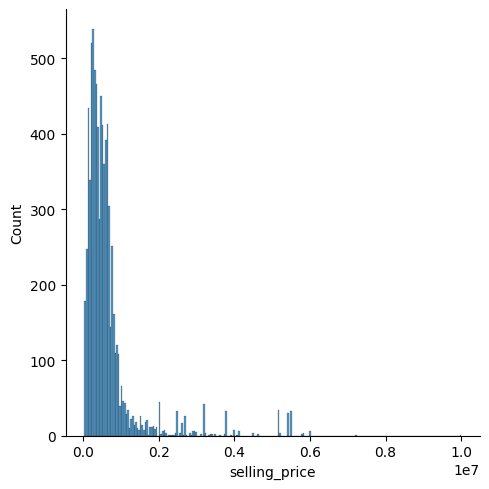

In [29]:
#distribution plot for selling price
sns.displot(data = df, x = 'selling_price')

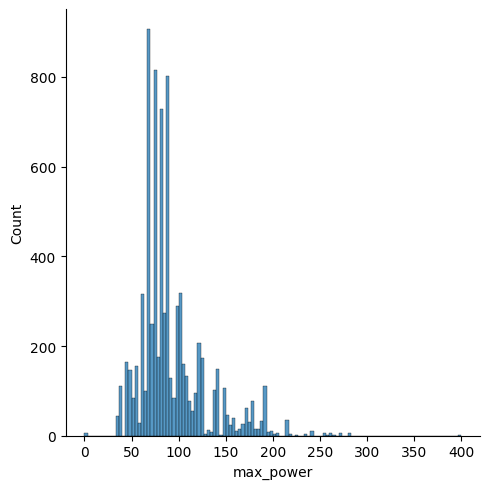

In [30]:
#distribution plot for max power
sns.displot(data = df, x = 'max_power')

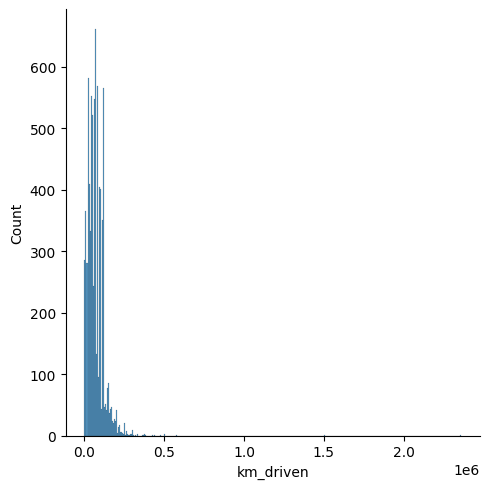

In [31]:
#distribution plot for km driven
sns.displot(data = df, x = 'km_driven')

#### 3.2 Multivariate Analysis

**Boxplot**

Text(0.5, 0, 'Selling Price')

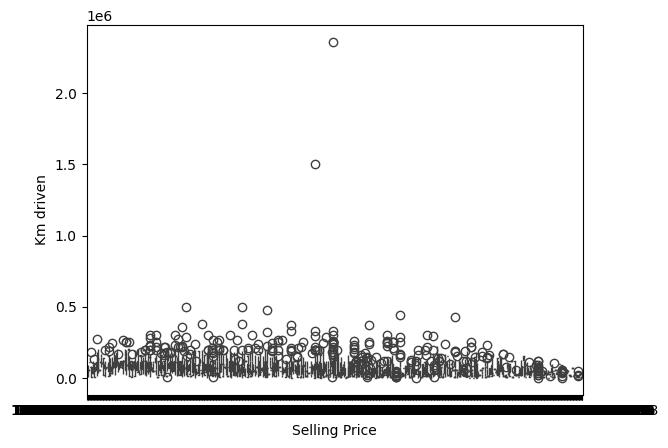

In [32]:
sns.boxplot(x = np.log(df["selling_price"]), y = df["km_driven"])
plt.ylabel("Km driven")
plt.xlabel("Selling Price")

**Scatterplot**

<Axes: xlabel='year', ylabel='km_driven'>

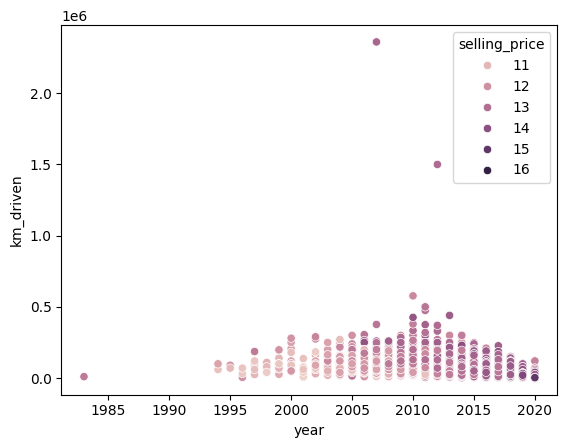

In [33]:
sns.scatterplot(x = df['year'], y = df['km_driven'], hue=(np.log(df['selling_price'])))

**Correlation Matrix**

In [34]:
# creating a copy of the dataset and removing name in order to visualize in the correlation matrix
dfcopy = df.copy()
dfcopy.drop(['name'], axis='columns', inplace=True)

<Axes: >

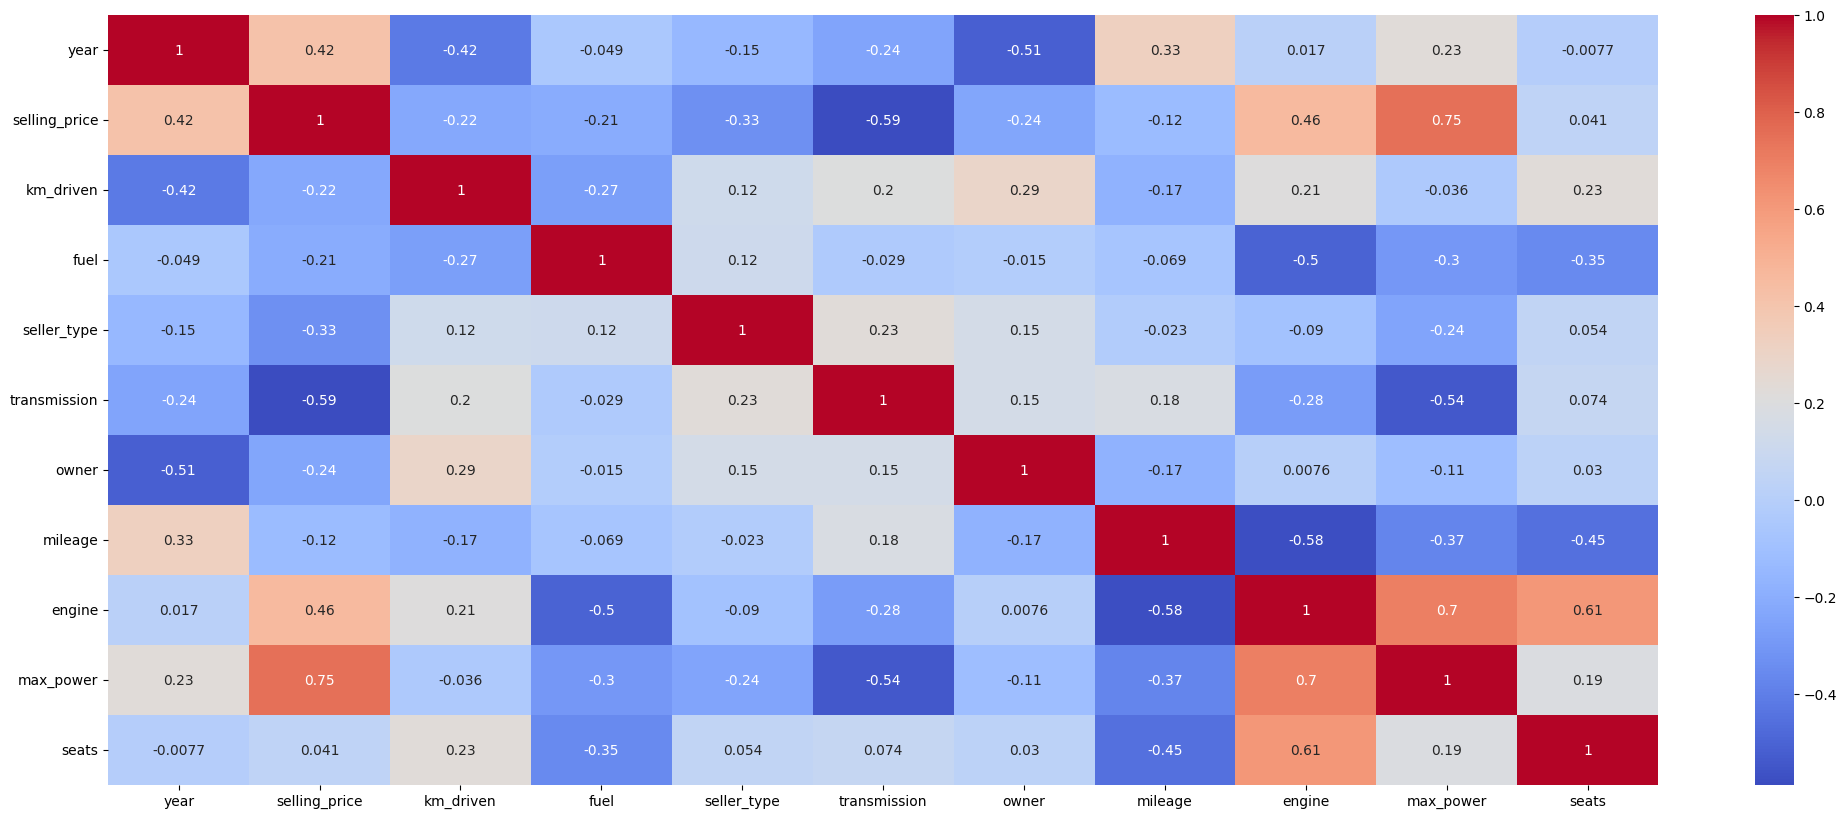

In [35]:
#correlation matrix
plt.figure(figsize=(25, 10))
sns.heatmap(dfcopy.corr(), annot=True, cmap='coolwarm')

### 4. Feature Selection

In [36]:
# from the correlation matrix, we can see that  max_power, engine, and year have the highest correlation. 
# let's include 'mileage' as it could significantly influence the car's value.

X = df[['engine', 'max_power', 'mileage', 'year']]

# since selling price is our y and is a big number, we transform using log transform
y = np.log(df['selling_price'])
X.shape, y.shape

((8028, 4), (8028,))

In [37]:
y.head

<bound method NDFrame.head of 0       13.017003
1       12.821258
2       11.970350
3       12.323856
4       11.775290
          ...    
8123    12.676076
8124    11.813030
8125    12.853176
8126    12.577636
8127    12.577636
Name: selling_price, Length: 8028, dtype: float64>

In [38]:
# check null or missing values for our features
X.isnull().sum()

engine       214
max_power    208
mileage      214
year           0
dtype: int64

#### Train Test Split

In [39]:
# splitting the data using train_test_split before adding the missing/null values
# i have splited the data in 80/20 ratio, 80 for training and 20 for testing

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6422, 4), (1606, 4), (6422,), (1606,))

### 5. Preprocessing

In [40]:
# chekcing null values in the X_train data 
X_train.isnull().sum()

engine       171
max_power    165
mileage      171
year           0
dtype: int64

In [41]:
# chekcing null values in the X_test data 
X_test.isnull().sum()

engine       43
max_power    43
mileage      43
year          0
dtype: int64

<Axes: xlabel='engine', ylabel='Count'>

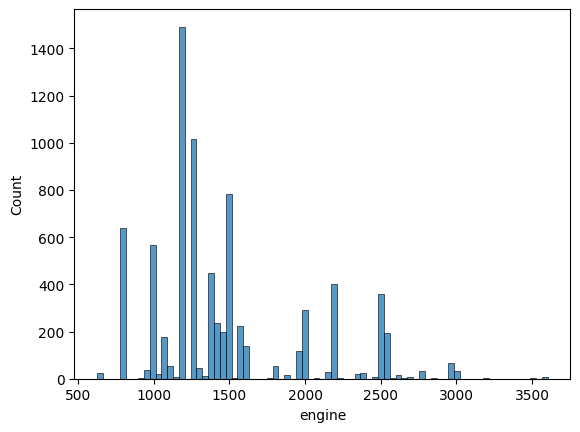

In [42]:
# checking the skewness of the features to fill in the null values using histplot

sns.histplot(data=df, x='engine')


In [43]:
# from the diagram above, it is a positively skewed distribution. To confirm it, we use scipy.stats
from scipy.stats import skew

skewness = skew(df['engine'].dropna())
print(f"Skewness: {skewness}")

Skewness: 1.1253113204700755


<Axes: xlabel='year', ylabel='Count'>

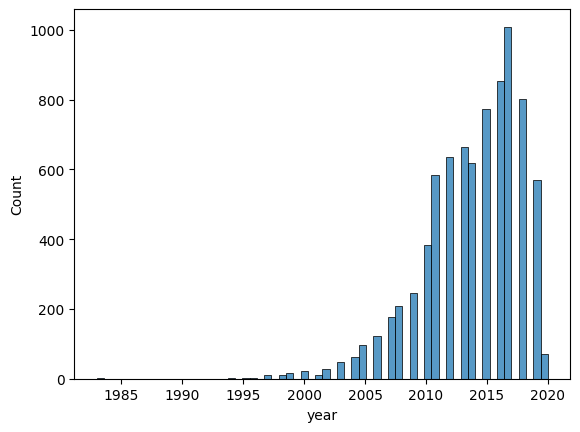

In [44]:
sns.histplot(data=df, x='year')

<Axes: xlabel='mileage', ylabel='Count'>

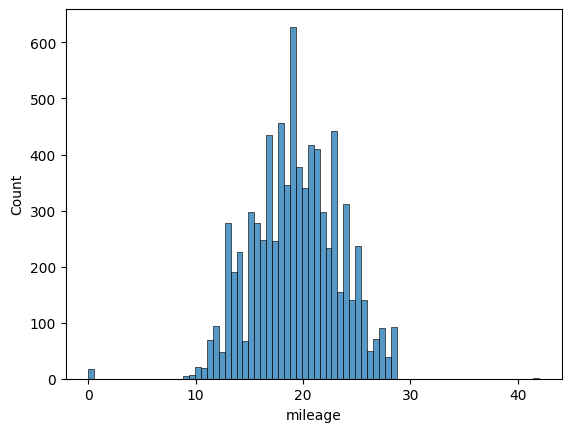

In [45]:
sns.histplot(data=df, x='mileage')

In [46]:
# from the diagram, it is an almost normal but slightly negative skew as we have few data near 0
from scipy.stats import skew

skewness = skew(df['mileage'].dropna())
print(f"Skewness: {skewness}")


Skewness: -0.17324819807259195


<Axes: xlabel='max_power', ylabel='Count'>

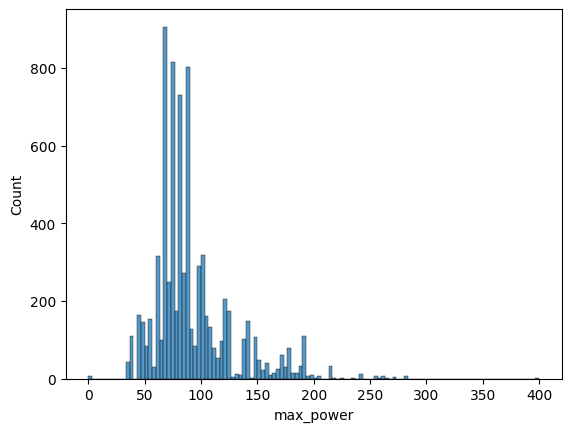

In [47]:
sns.histplot(data=df, x='max_power')

In [48]:
# from the diagram above, it is a positively skewed distribution.
skewness = skew(df['max_power'].dropna())
print(f"Skewness: {skewness}")

Skewness: 1.6196610207802749


In [49]:
# after analysis of the graph, we fill the missing values with median for the columns

# filling missing values in X_train with its median
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)

# filling missing values in X_test with the median of X_train
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)


In [50]:
X_train['engine'].median(), X_train['mileage'].median(), X_train['max_power'].median()

(np.float64(1248.0), np.float64(19.3), np.float64(82.85))

In [51]:
# check for missing values
X_train.isnull().sum(), X_test.isnull().sum(), y_train.isnull().sum(), y_test.isnull().sum()

(engine       0
 max_power    0
 mileage      0
 year         0
 dtype: int64,
 engine       0
 max_power    0
 mileage      0
 year         0
 dtype: int64,
 np.int64(0),
 np.int64(0))

In [52]:
# we need to ensure that the number of samples in the feature matrices (X_train, X_test) matches
assert(X_test.shape[0] == y_test.shape[0])

In [53]:
assert(X_train.shape[0] == y_train.shape[0])

In [54]:
X_train

,engine,max_power,mileage,year
2982,799.0,53.30,25.17,2016
2430,796.0,47.30,22.74,2013
6294,1248.0,82.85,19.30,2009
6255,2179.0,153.86,17.60,2018
4253,1998.0,68.00,14.80,1999
...,...,...,...,...
5293,1197.0,78.90,20.36,2013
5461,998.0,67.04,20.51,2016
865,1248.0,88.76,20.77,2015
7701,2487.0,214.56,22.37,2019


In [55]:
df.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,0,1,1,1,23.4,1248.0,74.0,5.0


#### Scaling

In [56]:
# to ensure faster convergence, we scale the features usint StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [57]:
# saving scaler model for the webapp
import joblib
joblib.dump(scaler, "../app/model/scaler.dump")

['../app/model/scaler.dump']

### A2 code here

In [59]:
#experiment tracking
import mlflow
print(mlflow.__version__)
import os
from sklearn.preprocessing import PolynomialFeatures

# # This the dockerized method.
# # We build two docker containers, one for python/jupyter and another for mlflow.
# # The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("http://localhost:7070")
# # In the dockerized way, the user who runs this code will be `root`.
# # The MLflow will also log the run user_id as `root`.
# # To change that, we need to set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "st125168"
# mlflow.create_experiment(name="car-price-125168")  #create if you haven't create
mlflow.set_experiment(experiment_name="car-price-125168")

2025/02/16 15:15:09 INFO mlflow.tracking.fluent: Experiment with name 'car-price-125168' does not exist. Creating a new experiment.


2.20.1


<Experiment: artifact_location='mlflow-artifacts:/711665603713139957', creation_time=1739693709779, experiment_id='711665603713139957', last_update_time=1739693709779, lifecycle_stage='active', name='car-price-125168', tags={}>

In [60]:
from sklearn.model_selection import KFold

class LinearRegression(object):
    
    #in this class, we add cross validation as well for some spicy code....
    kfold = KFold(n_splits=10)
            
    def __init__(self, regularization, lr=0.01, method='batch', num_epochs=100, init_method = 'zero', use_momentum=False, momentum =0.9, batch_size=2, cv=kfold, degree=None):
        self.lr         = lr
        self.num_epochs = num_epochs
        self.init_method = init_method 
        self.use_momentum = use_momentum
        self.momentum = momentum
        self.batch_size = batch_size
        self.method     = method
        self.cv         = cv
        self.regularization = regularization
        self.velocity = None
        self.prev_step = 0
        self.degree = degree

    def mse(self, ytrue, ypred):
        return ((ypred - ytrue) ** 2).mean()

    def r2_score(self, ytrue, ypred):
        ss_total = np.sum((ytrue - np.mean(ytrue)) ** 2)
        ss_residual = np.sum((ytrue - ypred) ** 2)
        return 1 - (ss_residual / ss_total)

    def initialize_weights(self, n_features):
        if self.init_method == "xavier":
            limit = 1.0 / np.sqrt(n_features)
            self.theta = np.random.uniform(-limit, limit, size=n_features).astype('float')
        else:
            self.theta = np.zeros(n_features ).astype('float')

    def fit(self, X_train, y_train):
        X_train = np.array(X_train)
        y_train = np.array(y_train)    

        X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))

        #create a list of kfold scores
        self.kfold_scores = list()
        
        #reset val loss
        self.val_loss_old = np.inf

        #kfold.split in the sklearn.....
        #5 splits
        

        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]

            feats = X_train.shape[1]
            self.initialize_weights(feats)
            
            self.velocity = np.zeros_like(self.theta) if self.use_momentum else None

            
            #define X_cross_train as only a subset of the data
            #how big is this subset?  => mini-batch size ==> 50
            
            #one epoch will exhaust the WHOLE training set
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                
                params = {"method": self.method, "lr": self.lr, "reg": type(self).__name__}
                mlflow.log_params(params=params)
                
                for epoch in range(self.num_epochs):
                
                    #with replacement or no replacement
                    #with replacement means just randomize
                    #with no replacement means 0:50, 51:100, 101:150, ......300:323
                    #shuffle your index
                    perm = np.random.permutation(X_cross_train.shape[0])
                            
                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]
                    
                    if self.method == 'sto':
                        for batch_idx in range(X_cross_train.shape[0]):
                            X_method_train = X_cross_train[batch_idx].reshape(1, -1) #(11,) ==> (1, 11) ==> (m, n)
                            y_method_train = y_cross_train[batch_idx] 
                            train_loss = self._train(X_method_train, y_method_train)
                    elif self.method == 'mini':
                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            #batch_idx = 0, 50, 100, 150
                            X_method_train = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                            y_method_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                            train_loss = self._train(X_method_train, y_method_train)
                    else:
                        X_method_train = X_cross_train
                        y_method_train = y_cross_train
                        train_loss = self._train(X_method_train, y_method_train)

                    avg_loss = np.average(train_loss)
                    mlflow.log_metric(key="train_loss", value=avg_loss, step=epoch)

                    yhat_val = self.predict(X_cross_val)
                    val_loss_new = self.mse(y_cross_val, yhat_val)
                    val_r2_score = self.r2_score(y_cross_val, yhat_val)
                    mlflow.log_metric(key="val_loss", value=val_loss_new, step=epoch)
                    
                    #early stopping
                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new
            
                self.kfold_scores.append(val_loss_new)
                print(f"Fold {fold}: {val_loss_new} {val_r2_score}")
            
                    
    def _train(self, X, y):
        yhat = self.predict(X)
        m    = X.shape[0]
         # Compute gradient
        grad = (1/m) * X.T @ (yhat - y)
        
        regularization_term = np.concatenate([[0], self.regularization.derivation(self.theta[1:])])
        grad += regularization_term

        if self.use_momentum:
            self.step = self.lr * grad
            self.theta = self.theta - self.step + self.momentum * self.prev_step
            self.prev_step = self.step
        else:
            self.theta = self.theta - self.lr * grad
        return self.mse(y, yhat), self.r2_score(y, yhat)
    
    def predict(self, X):
        if self.theta is None:
            raise ValueError("Model weights (theta) have not been initialized. Call fit() first.")
        
        if X.shape[1] == self.theta.shape[0] - 1:
            X = np.hstack([np.ones((X.shape[0], 1)), X]) 
        return X @ self.theta   #===>(m, n) @ (n, )
    
    def _coef(self):
        return self.theta[1:]  #remind that theta is (w0, w1, w2, w3, w4.....wn)
                               #w0 is the bias or the intercept
                               #w1....wn are the weights / coefficients / theta
    def _bias(self):
        return self.theta[0]
    
    def _polynomial_features(self, X):  
    
        if self.poly_degree is None:
            print("poly:",X)
            return X
        
        X = np.array(X, dtype='float')  # Ensure NumPy format
        n_samples, n_features = X.shape
        poly_features = [X]
    
        # Add higher-degree features (x^2, x^3, etc.)
        for degree in range(2, self.poly_degree + 1):
            poly_features.append(X ** degree)
    
        # Add interaction terms for degree = 2  ## tried combination but it was too much for weights, exploding everywhere ..!!
        # if self.poly_degree == 2:
        #     interaction_terms = [np.prod(X[:, np.array(combo)], axis=1) for combo in combinations(range(n_features), 2)]
        #     return np.column_stack(poly_features + interaction_terms)
    
        return np.concatenate(poly_features, axis=1)
    
    def plot_feature_importance(self, feature_names):
        import matplotlib.pyplot as plt
        coefficients = self._coef()
        importances = np.abs(coefficients)
        indices = np.argsort(importances)[::-1]
        plt.figure()
        plt.title("Feature Importance")
        plt.bar(range(len(feature_names)), importances[indices], align="center")
        plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=90)
        plt.show()

In [61]:
class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class Lasso(LinearRegression):
    
    def __init__(self, l, **kwargs):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, **kwargs)
        
class Ridge(LinearRegression):
    
    def __init__(self, l,**kwargs):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, **kwargs)

class Normal(LinearRegression):
    def __init__(self, **kwargs):
        super().__init__(regularization=None, **kwargs)
        


In [62]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [63]:
print(mlflow.get_tracking_uri())

http://localhost:7070


In [71]:
import mlflow
from itertools import product  # For generating all combinations of parameters

# Define parameter lists
regs = ["Lasso", "Ridge"]
weights = ['zeros', 'xavier', 'normal']
lr = [0.01, 0.001, 0.0001]
methods = ["mini", "sto"]
momentum = [None, 0.8]
degrees = [None, 2]

# Generate all combinations of parameters
param_combinations = product(regs, weights, lr, methods, momentum, degrees)

# Loop through each combination
for reg, init_method, learning_rate, method, mom, degree in param_combinations:
    # Construct the parameter dictionary for the model
    params = {
        "method": method,
        "lr": learning_rate,
        "l": 0.1,  # Regularization strength (lambda)
        "init_method": init_method,
        "use_momentum": mom is not None,  # Use momentum if mom is not None
        "momentum": mom if mom is not None else 0.9,  # Default momentum value
        "batch_size": 5,
        "degree": degree  # Polynomial degree (if applicable)
    }

    # Start an MLflow run for this combination of parameters
    with mlflow.start_run(run_name=f"reg-{reg}-method-{method}-lr-{learning_rate}-init-{init_method}-mom-{mom}-deg-{degree}", nested=True):
        print("=" * 5, f"Running: reg={reg}, method={method}, lr={learning_rate}, init={init_method}, mom={mom}, deg={degree}", "=" * 5)

        # Ensure PolynomialRegression or other model classes are defined
        type_of_regression = str_to_class(reg)  # Assuming `str_to_class` maps string to class
        if type_of_regression is None:
            raise ValueError(f"Model class '{reg}' not found. Make sure it's defined.")

        # Initialize the model with the current parameters
        model = type_of_regression(**params)

        # Train the model
        print("Calling fit()...")
        model.fit(X_train, y_train)

        # Evaluate the model
        yhat = model.predict(X_test)
        mse = model.mse(y_test, yhat)
        r2_score = model.r2_score(y_test, yhat)

        # Print metrics
        print("Test MSE: ", mse)
        print("R squared:", r2_score)

        # Log metrics to MLflow
        mlflow.log_metric("test_mse", mse)
        mlflow.log_metric("test_r2", r2_score)

        # Log the model
        signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

        # End the MLflow run
        mlflow.end_run()

===== Running: reg=Lasso, method=mini, lr=0.01, init=zeros, mom=None, deg=None =====
Calling fit()...
Fold 0: 0.13340489151944043 0.8130602303519939
🏃 View run Fold-0 at: http://localhost:7070/#/experiments/711665603713139957/runs/ec1899cf94484c4ab73a1200570da22c
🧪 View experiment at: http://localhost:7070/#/experiments/711665603713139957
Fold 1: 0.1309357112762512 0.803842436060803
🏃 View run Fold-1 at: http://localhost:7070/#/experiments/711665603713139957/runs/cf3c43712c624813a619227d64429524
🧪 View experiment at: http://localhost:7070/#/experiments/711665603713139957
Fold 2: 0.12152785628491593 0.8203719490021716
🏃 View run Fold-2 at: http://localhost:7070/#/experiments/711665603713139957/runs/7d3a56f44a9c4d9b8d32f98ca448b1f5
🧪 View experiment at: http://localhost:7070/#/experiments/711665603713139957
Fold 3: 0.1435745911284067 0.7869486006459504
🏃 View run Fold-3 at: http://localhost:7070/#/experiments/711665603713139957/runs/11a20256b18e4bcf803f00a2ff273483
🧪 View experiment at: 

In [ ]:
_grid_model = Ridge(method="sto", lr=0.01,l=0.1, init_method= "xavier", degree=None, momentum= 0.9)
_grid_model.fit(X_train, y_train)

Fold 0: 22.799478667707124 -30.94882317800693
🏃 View run Fold-0 at: http://localhost:7070/#/experiments/711665603713139957/runs/dea02e1a9de44b39ad2de38ca06aaa12
🧪 View experiment at: http://localhost:7070/#/experiments/711665603713139957
Fold 1: 23.440968932563198 -34.117412334399525
🏃 View run Fold-1 at: http://localhost:7070/#/experiments/711665603713139957/runs/8204ce90b2ac4154a72e07930349a28b
🧪 View experiment at: http://localhost:7070/#/experiments/711665603713139957
Fold 2: 22.07475678417391 -31.628285058332075
🏃 View run Fold-2 at: http://localhost:7070/#/experiments/711665603713139957/runs/11d08583bac744de955111f8162ba81b
🧪 View experiment at: http://localhost:7070/#/experiments/711665603713139957
Fold 3: 24.59600060863579 -35.498187506564435
🏃 View run Fold-3 at: http://localhost:7070/#/experiments/711665603713139957/runs/3138c0e46c044ef29615ea9bf92adbe0
🧪 View experiment at: http://localhost:7070/#/experiments/711665603713139957
Fold 4: 22.26112564443514 -27.72581834342185
🏃 

TypeError: LinearRegression.plot_feature_importance() missing 1 required positional argument: 'feature_names'

In [ ]:
import cloudpickle

with open("../app/model/car_price_predictor", "wb") as f:
    cloudpickle.dump(_grid_model, f)

In [72]:
with open("../app/model/car_price_predictor", "rb") as f:
    loaded_model = cloudpickle.load(f)

NameError: name 'cloudpickle' is not defined

In [69]:
test1 = pd.DataFrame([[ 2967, 241, 12, 2015]],
                         columns=[ 'engine', 'max_power','mileage','year' ])

In [70]:
scaler_fit_model = joblib.load("../app/model/scaler.dump")

# since our model is trained by scaling the features, need to do it here as well.
final_data_1 = scaler_fit_model.transform(test1)

sample_1 = loaded_model.predict(final_data_1)

print("Predicted price of Sample 1 car:", np.exp(sample_1[0]))

NameError: name 'loaded_model' is not defined